In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image

In [2]:
# Load the dataset from the local directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset/train',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    label_mode='int'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset/test',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    label_mode='int'
)

class_names = train_dataset.class_names

Found 7967 files belonging to 3 classes.
Found 1593 files belonging to 3 classes.


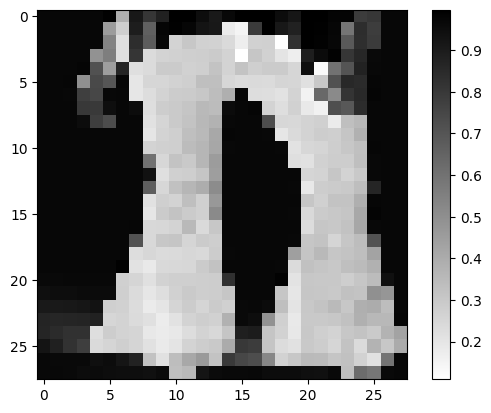

In [3]:
# Normalize the images
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Display the first image from the training dataset
plt.figure()
for images, labels in train_dataset.take(1):
    plt.imshow(images[0].numpy().squeeze(), cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [4]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

e:\Softwares\miniconda3\envs\dev\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,987 (507.76 KB)

 Trainable params: 129,987 (507.76 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [6]:
model.fit(train_dataset, epochs=30)

Epoch 1/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7464 - loss: 0.6040
Epoch 2/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9008 - loss: 0.2789
Epoch 3/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9264 - loss: 0.2084
Epoch 4/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9395 - loss: 0.1691
Epoch 5/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9510 - loss: 0.1358
Epoch 6/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9643 - loss: 0.1047
Epoch 7/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9717 - loss: 0.0885
Epoch 8/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9757 - loss: 0.0658
Epoch 9/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9813 - loss: 0.0482
Epoch 10/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9866 - loss: 0.0415
Epoch 11/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9876 - loss: 0.0337
Epoch 12/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
model.save("model.keras")
model.save_weights("model_weights.weights.h5")

In [11]:
loaded_model = tf.keras.models.load_model('model.keras')
test_loss, test_acc = loaded_model.evaluate(test_dataset, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = loaded_model.predict(test_dataset)

50/50 - 1s - 20ms/step - accuracy: 0.9981 - loss: 0.0068

Test accuracy: 0.9981167316436768
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
